# Task 1: prediction of house Prices

***Problem Statement*** : Predicting the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

***Metric***: Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

***Objective*** :

* Understand the Dataset & Creative feature engineering .
* Advanced regression techniques like random forest and gradient boosting.
* Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

***Dataset***:

The dataset used is [House Prices - Advanced Regression Techniques]('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview') from Kaggle. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

***Methodology***:

The following steps are adapted to perform the prediction of housing price:

1. Data collection and exploration
2. Exploratory Data Analysis (EDA) 
3. Data Preprocessing
4. Feature Engineering
5. Model training
6. Model Evaluation

## 1. Data Collection and Exploration

This step involves loading of dataset and exploring data and columns.

In [1]:
# Import modules

# os module for file operations
import os
# Modules for Data Manipulation
import math
import numpy as np
import pandas as pd
# Modules for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

from IPython.display import display

# Sckit-learn module for Model building
from statsmodels.formula import api
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Module for Feature Engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load the training and testing datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display top 5 data rows
display(train_df.head(5))
display(test_df.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


From the pricing data we observe the values are continous, thus its a regression problem. We will need a regressor model to predict prices

In [3]:
# explore the columns in dataset
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

In [4]:
# Remove 'Id' column
train_df = train_df.drop(['Id'], axis=1)
test_df = test_df.drop(['Id'], axis=1)

# Choose features and target of the model 
target = 'SalePrice'
features = [i for i in train_df.columns if i not in [target]]

# Summary of Training and Testing data
print('The Training Datset consists of {} columns & {} samples.'.format(train_df.shape[1], train_df.shape[0]))
print('The Testing Datset consists of {} columns & {} samples.\n'.format(test_df.shape[1], test_df.shape[0]))
print('Features: {}\n'.format(features))
print('Target: {}\n'.format(target))

The Training Datset consists of 80 columns & 1460 samples.
The Testing Datset consists of 79 columns & 1459 samples.

Features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 

## 2. Exploratory Data Analysis (EDA) 

In order to understnad the data, let's explore key features in the dataset.

1. OverallQual 
2. YearBuilt
3. TotalBsmtSF
4. GrLivArea
5. GarageArea
6. 1stFlrSF

### Visualisation of Target Variable

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


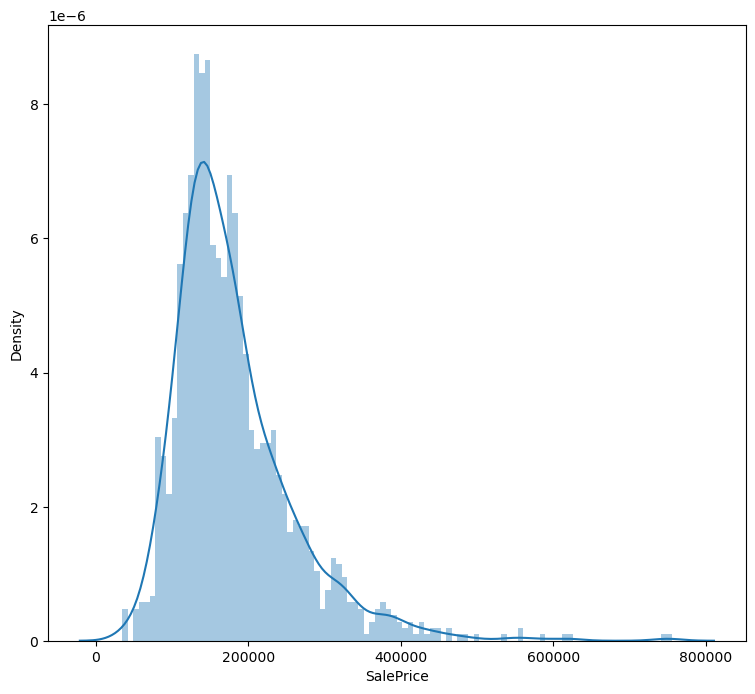

In [5]:
print(train_df[target].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df[target], bins=100);

### Bivariate Analysis

#### 1. Relationship with OverallQual

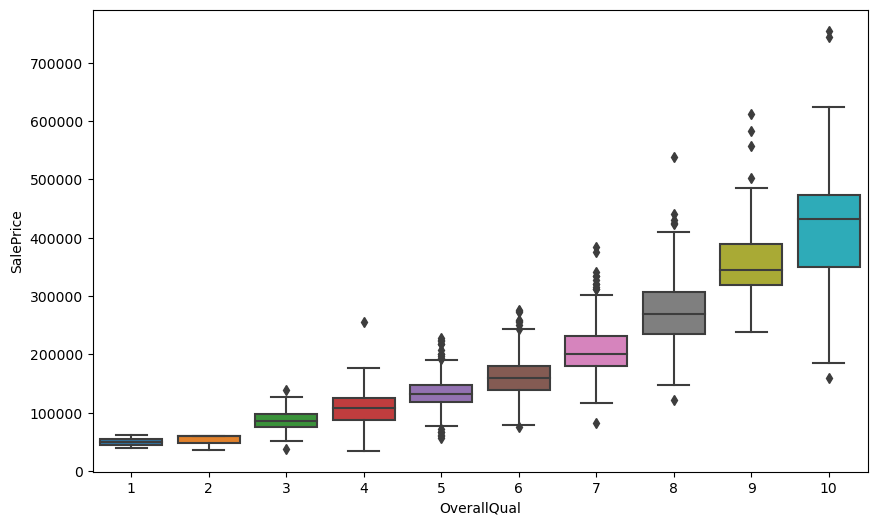

In [6]:
#box plot overallqual/saleprice
var = 'OverallQual'
fig = sns.boxplot(x=var, y="SalePrice", data=train_df)

#### 2. Relationship with OverallQual

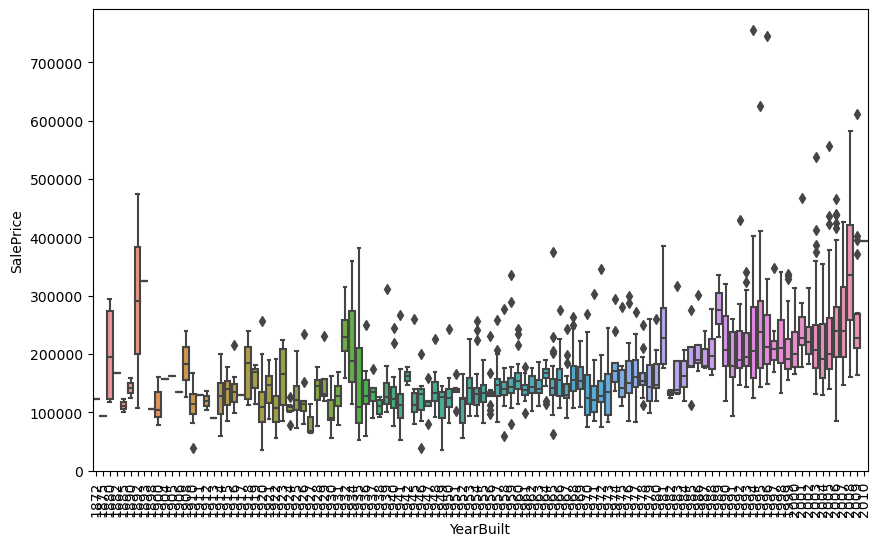

In [7]:
var = 'YearBuilt'
sns.boxplot(x=var, y="SalePrice", data=train_df)
plt.xticks(rotation=90);

#### 3. Relationship with TotalBsmtSF

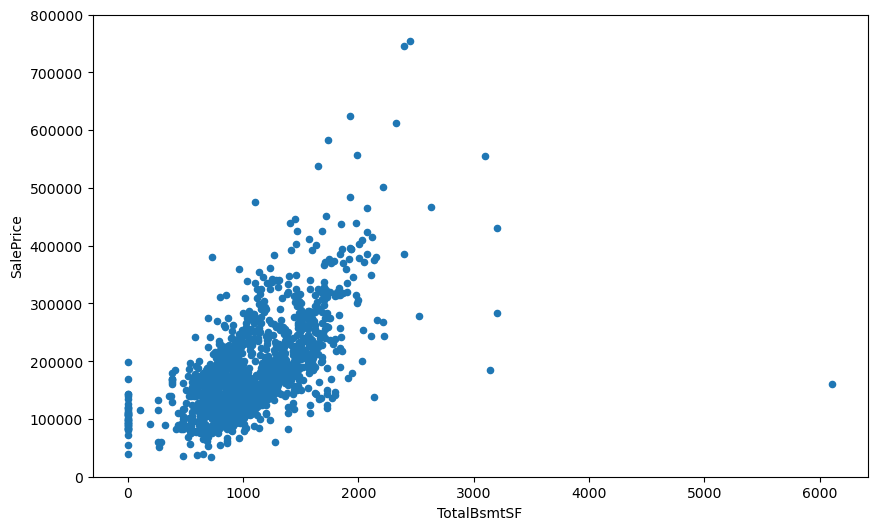

In [8]:
# Visualise TotalBsmtSF-SalePrice using Scatter plot
var = 'TotalBsmtSF'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### 4. Relationship with GrLivArea

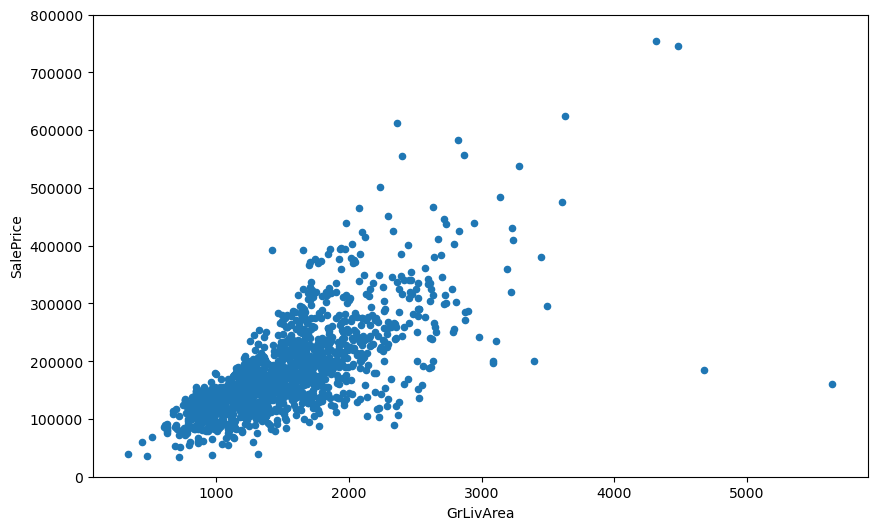

In [9]:
# Visualise GrLivArea-SalePrice using Scatter plot
var = 'GrLivArea'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### 5. Relationship with GarageArea

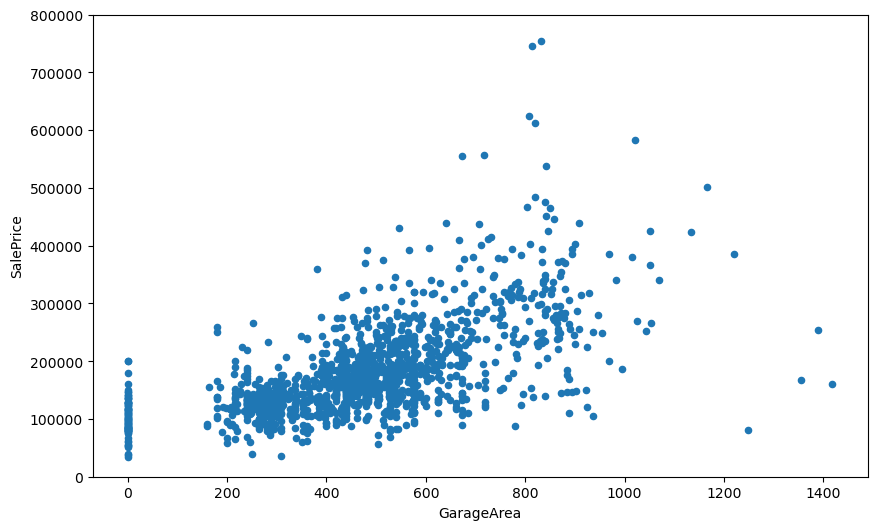

In [10]:
# Visualise GarageArea-SalePrice using Scatter plot
var = 'GarageArea'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### 6. Relationship with 1stFlrSF

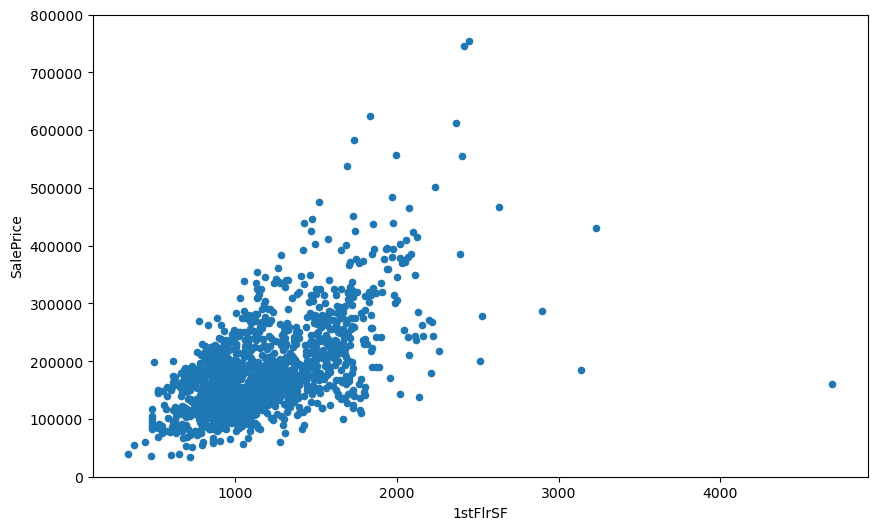

In [11]:
# Visualise 1stFlrSF-SalePrice using Scatter plot
var = '1stFlrSF'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Inference

We can conclude that:

1. 'GrLivArea', 'TotalBsmtSF', 'GarageArea' and '1stFlrSFseem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
2. 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

## 3. Data Preprocessing

### a. Handling missing values

In [12]:
# Check for missing values
missing_values_train = train_df.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
print('In Training data, number of columns with missing values: {}\n'.format(len(missing_values_train)))
print(missing_values_train)

missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print('\n\nIn Testing data, number of columns with missing values: {}\n'.format(len(missing_values_test)))
print(missing_values_test)

In Training data, number of columns with missing values: 19

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In Testing data, number of columns with missing values: 33

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
Gar

Training dataset consists of 19 columns with missing data whereas testing data has 33 columns. Let's drop the common features in both dataset with highst missing values (greater than 5).

In [13]:
# Find dropping columns
drop_train = missing_values_train[missing_values_train > 5].index
print('In Training data, number of columns with missing values greater than 5: {}\n'.format(len(drop_train)))

drop_test = missing_values_test[missing_values_test > 5].index
print('In Testing data, number of columns with missing values greater than 5: {}\n'.format(len(drop_test)))

# Check for commonality between dropping features
if drop_train.all() == drop_test.all():
    print('The columns to be dropped: {}'.format(list(drop_test)))

In Training data, number of columns with missing values greater than 5: 18

In Testing data, number of columns with missing values greater than 5: 18

The columns to be dropped: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [14]:
# Drop the common features from both dataset
train_df.drop(drop_train, axis=1, inplace=True)
test_df.drop(drop_test, axis=1, inplace=True)

print('Training Data:')
display(train_df.head(5))
display(train_df.shape)
print('Testing Data:')
display(test_df.head(5))
display(test_df.shape)

Training Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


(1460, 62)

Testing Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


(1459, 61)

18 columns are dropped from training and testing dataset. But, there are few columns undropped. Let's imputate them. 

In [15]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [16]:
# Handling undropped columns

# Find remaining missing value columns
no_drop_train = missing_values_train[missing_values_train < 5].index.tolist()
print('In Training data, number of columns with missing values lesser than 5: {}'.format(len(drop_train)))
print(no_drop_train)

no_drop_test = missing_values_test[missing_values_test < 5].index.tolist()
print('\nIn Testing data, number of columns with missing values lesser than 5: {}'.format(len(drop_test)))
print(no_drop_test)

In Training data, number of columns with missing values lesser than 5: 18
['Electrical']

In Testing data, number of columns with missing values lesser than 5: 18
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [17]:
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)

# Handle missing numeric values (fill with mean)
numeric_cols_with_missing = test_df[no_drop_test].select_dtypes(exclude='object')
for col in numeric_cols_with_missing:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

# Handle missing categorical values (fill with 'Missing' category)
categorical_cols_with_missing = test_df[no_drop_test].select_dtypes(include='object')
for col in categorical_cols_with_missing:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

print('Training Data:')
display(train_df.head(5))
display(train_df.shape)
print('Testing Data:')
display(test_df.head(5))
display(test_df.shape)

Training Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


(1460, 62)

Testing Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


(1459, 61)

### b. Handling Duplicate values

In [18]:
# Check for duplicate values
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

### c. Handling Categorical Features

In [19]:
# Separate categorical and numerical features
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_df.select_dtypes(exclude=['object']).columns.tolist()

# Print the lists of categorical and numerical features
print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical Features:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [20]:
# One-hot encoding for Categorical features
lb = LabelEncoder()
for feature in categorical_features:
    train_df[feature] = lb.fit_transform(train_df[feature])
    test_df[feature] = lb.fit_transform(test_df[feature])

print('Training Data:')
display(train_df.head(5))
print('\n\nTesting Data:')
display(test_df.head(5))

Training Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000




Testing Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,11622,1,3,3,0,4,0,12,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,14267,1,0,3,0,0,0,12,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,13830,1,0,3,0,4,0,8,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,9978,1,0,3,0,4,0,8,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,5005,1,0,1,0,4,0,22,...,82,0,0,144,0,0,1,2010,8,4


### d. Data Splitting

In [21]:
# Compute training and testing data
target = 'SalePrice'
features = [i for i in train_df.columns if i not in [target]]
train_X = train_df[features]
train_Y = train_df[target]
Test_X = test_df[features]

# Split data into training and validation data
Train_X, Val_X, Train_Y, Val_Y = train_test_split(train_X, train_Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Training dataset:',Train_X.shape,Train_Y.shape)
print('Validation set:', Val_X.shape, Val_Y.shape)
print('Testing set:', Test_X.shape)

Training dataset: (1168, 61) (1168,)
Validation set: (292, 61) (292,)
Testing set: (1459, 61)


### e. Handling Outliers

In [22]:
numerical_features = Train_X.columns

# Function to remove outliers
def remove_outliers(df):

    # Detect features with outliers
    plt.figure(figsize=[10,3*math.ceil(len(numerical_features)/2)])
    for i in range(len(numerical_features)):
        plt.subplot(math.ceil(len(numerical_features)/2),2,i+1)
        train_df.boxplot(numerical_features[i])

    plt.show()

    # Remove Outliers
    for i in numerical_features:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df1 = df[df[i] <= (Q3+(1.5*IQR))]
        df1 = df[df[i] >= (Q1-(1.5*IQR))]
        df1 = df.reset_index(drop=True)


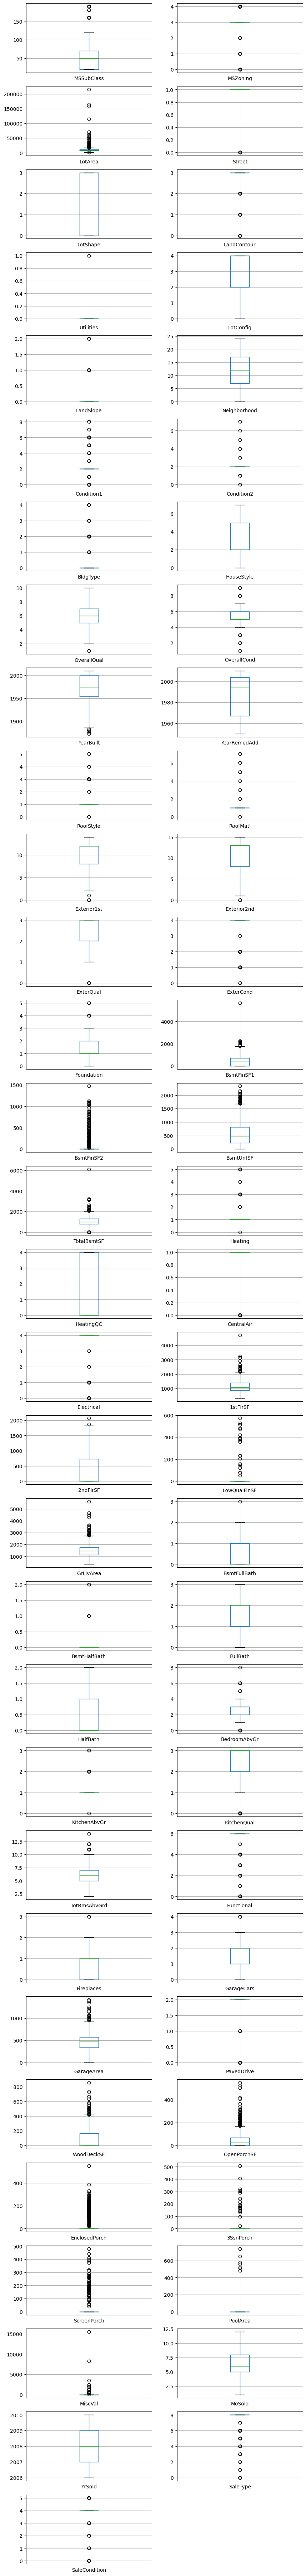

The Training dataset consists of 61 columns & 1460 samples.



In [23]:
# Remove outliers from Training dataset
remove_outliers(train_X)
print('The Training dataset consists of {} columns & {} samples.\n'.format(train_X.shape[1], train_X.shape[0]))

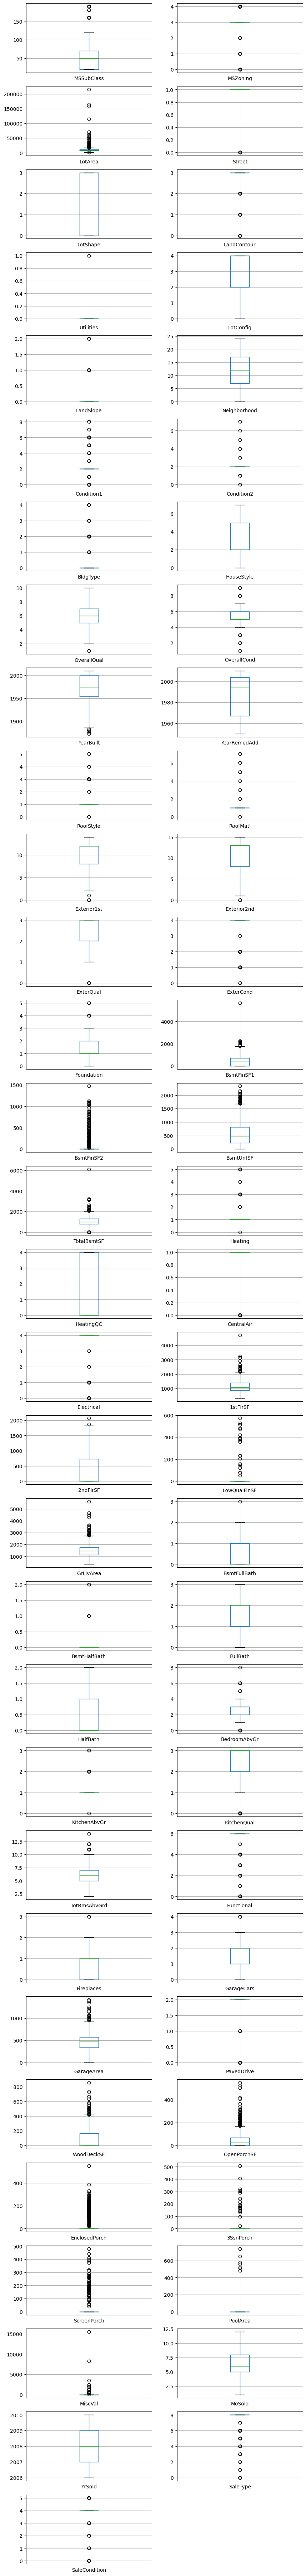

The Testing dataset consists of 61 columns & 1459 samples.



In [24]:
# Remove outliers from Testing dataset
remove_outliers(Test_X)
print('The Testing dataset consists of {} columns & {} samples.\n'.format(Test_X.shape[1], Test_X.shape[0]))

### d. Scaling

In [25]:
# Scaling features using Z-score normalization
std = StandardScaler()
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=Train_X.columns)
print('Standardardization on Training set\n')
print(Train_X_std.describe())

Val_X_std = std.fit_transform(Val_X)
Val_X_std = pd.DataFrame(Val_X_std, columns=Val_X.columns)
print('Standardardization on Training set\n')
print(Val_X_std.describe())


Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=Test_X.columns)
print('\nStandardardization on Testing set\n')
print(Test_X_std.describe())

Standardardization on Training set

         MSSubClass      MSZoning       LotArea        Street      LotShape  \
count  1.168000e+03  1.168000e+03  1.168000e+03  1.168000e+03  1.168000e+03   
mean  -8.516779e-17 -2.859205e-16  4.866731e-17  2.600659e-16 -6.995926e-17   
std    1.000428e+00  1.000428e+00  1.000428e+00  1.000428e+00  1.000428e+00   
min   -8.785477e-01 -4.932268e+00 -9.327983e-01 -1.705872e+01 -1.386826e+00   
25%   -8.785477e-01 -6.665227e-02 -3.024926e-01  5.862104e-02 -1.386826e+00   
50%   -1.734558e-01 -6.665227e-02 -9.459345e-02  5.862104e-02  7.473145e-01   
75%    2.966054e-01 -6.665227e-02  1.131024e-01  5.862104e-02  7.473145e-01   
max    3.116973e+00  1.555220e+00  2.081732e+01  5.862104e-02  7.473145e-01   

        LandContour    Utilities     LotConfig     LandSlope  Neighborhood  \
count  1.168000e+03  1168.000000  1.168000e+03  1.168000e+03  1.168000e+03   
mean   7.528225e-17     0.000000 -3.878176e-17 -1.977109e-17 -1.247100e-16   
std    1.000428e+0

## 4. Feature Engineering

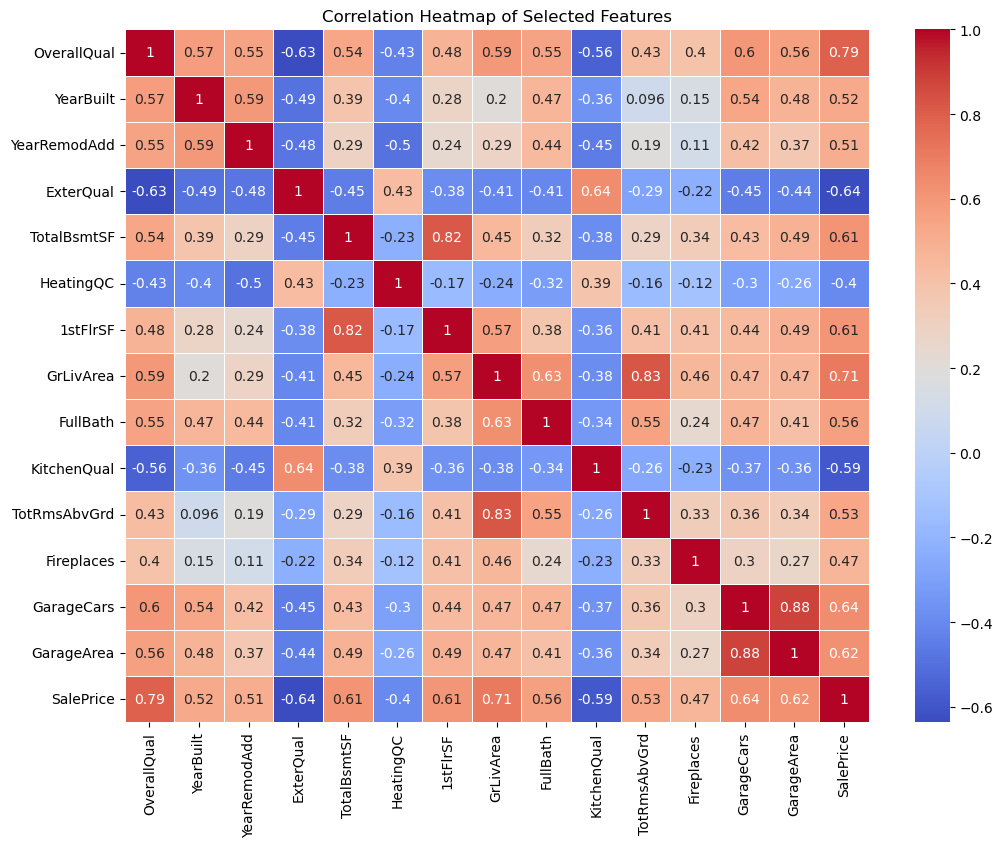

In [27]:
#correlation matrix
corrmat = train_df.corr()

# Set the correlation threshold (you can adjust this as needed)
correlation_threshold = 0.4

# Filter the features with moderate to high correlation with respect to the target
target_correlation = corrmat['SalePrice']
key_features = target_correlation[(target_correlation > correlation_threshold) | (target_correlation < -correlation_threshold)].index

# Create a heatmap of the selected features
plt.figure(figsize=(12, 9))
sns.heatmap(train_df[key_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

By above analysis, we have filtered out key features to train the model

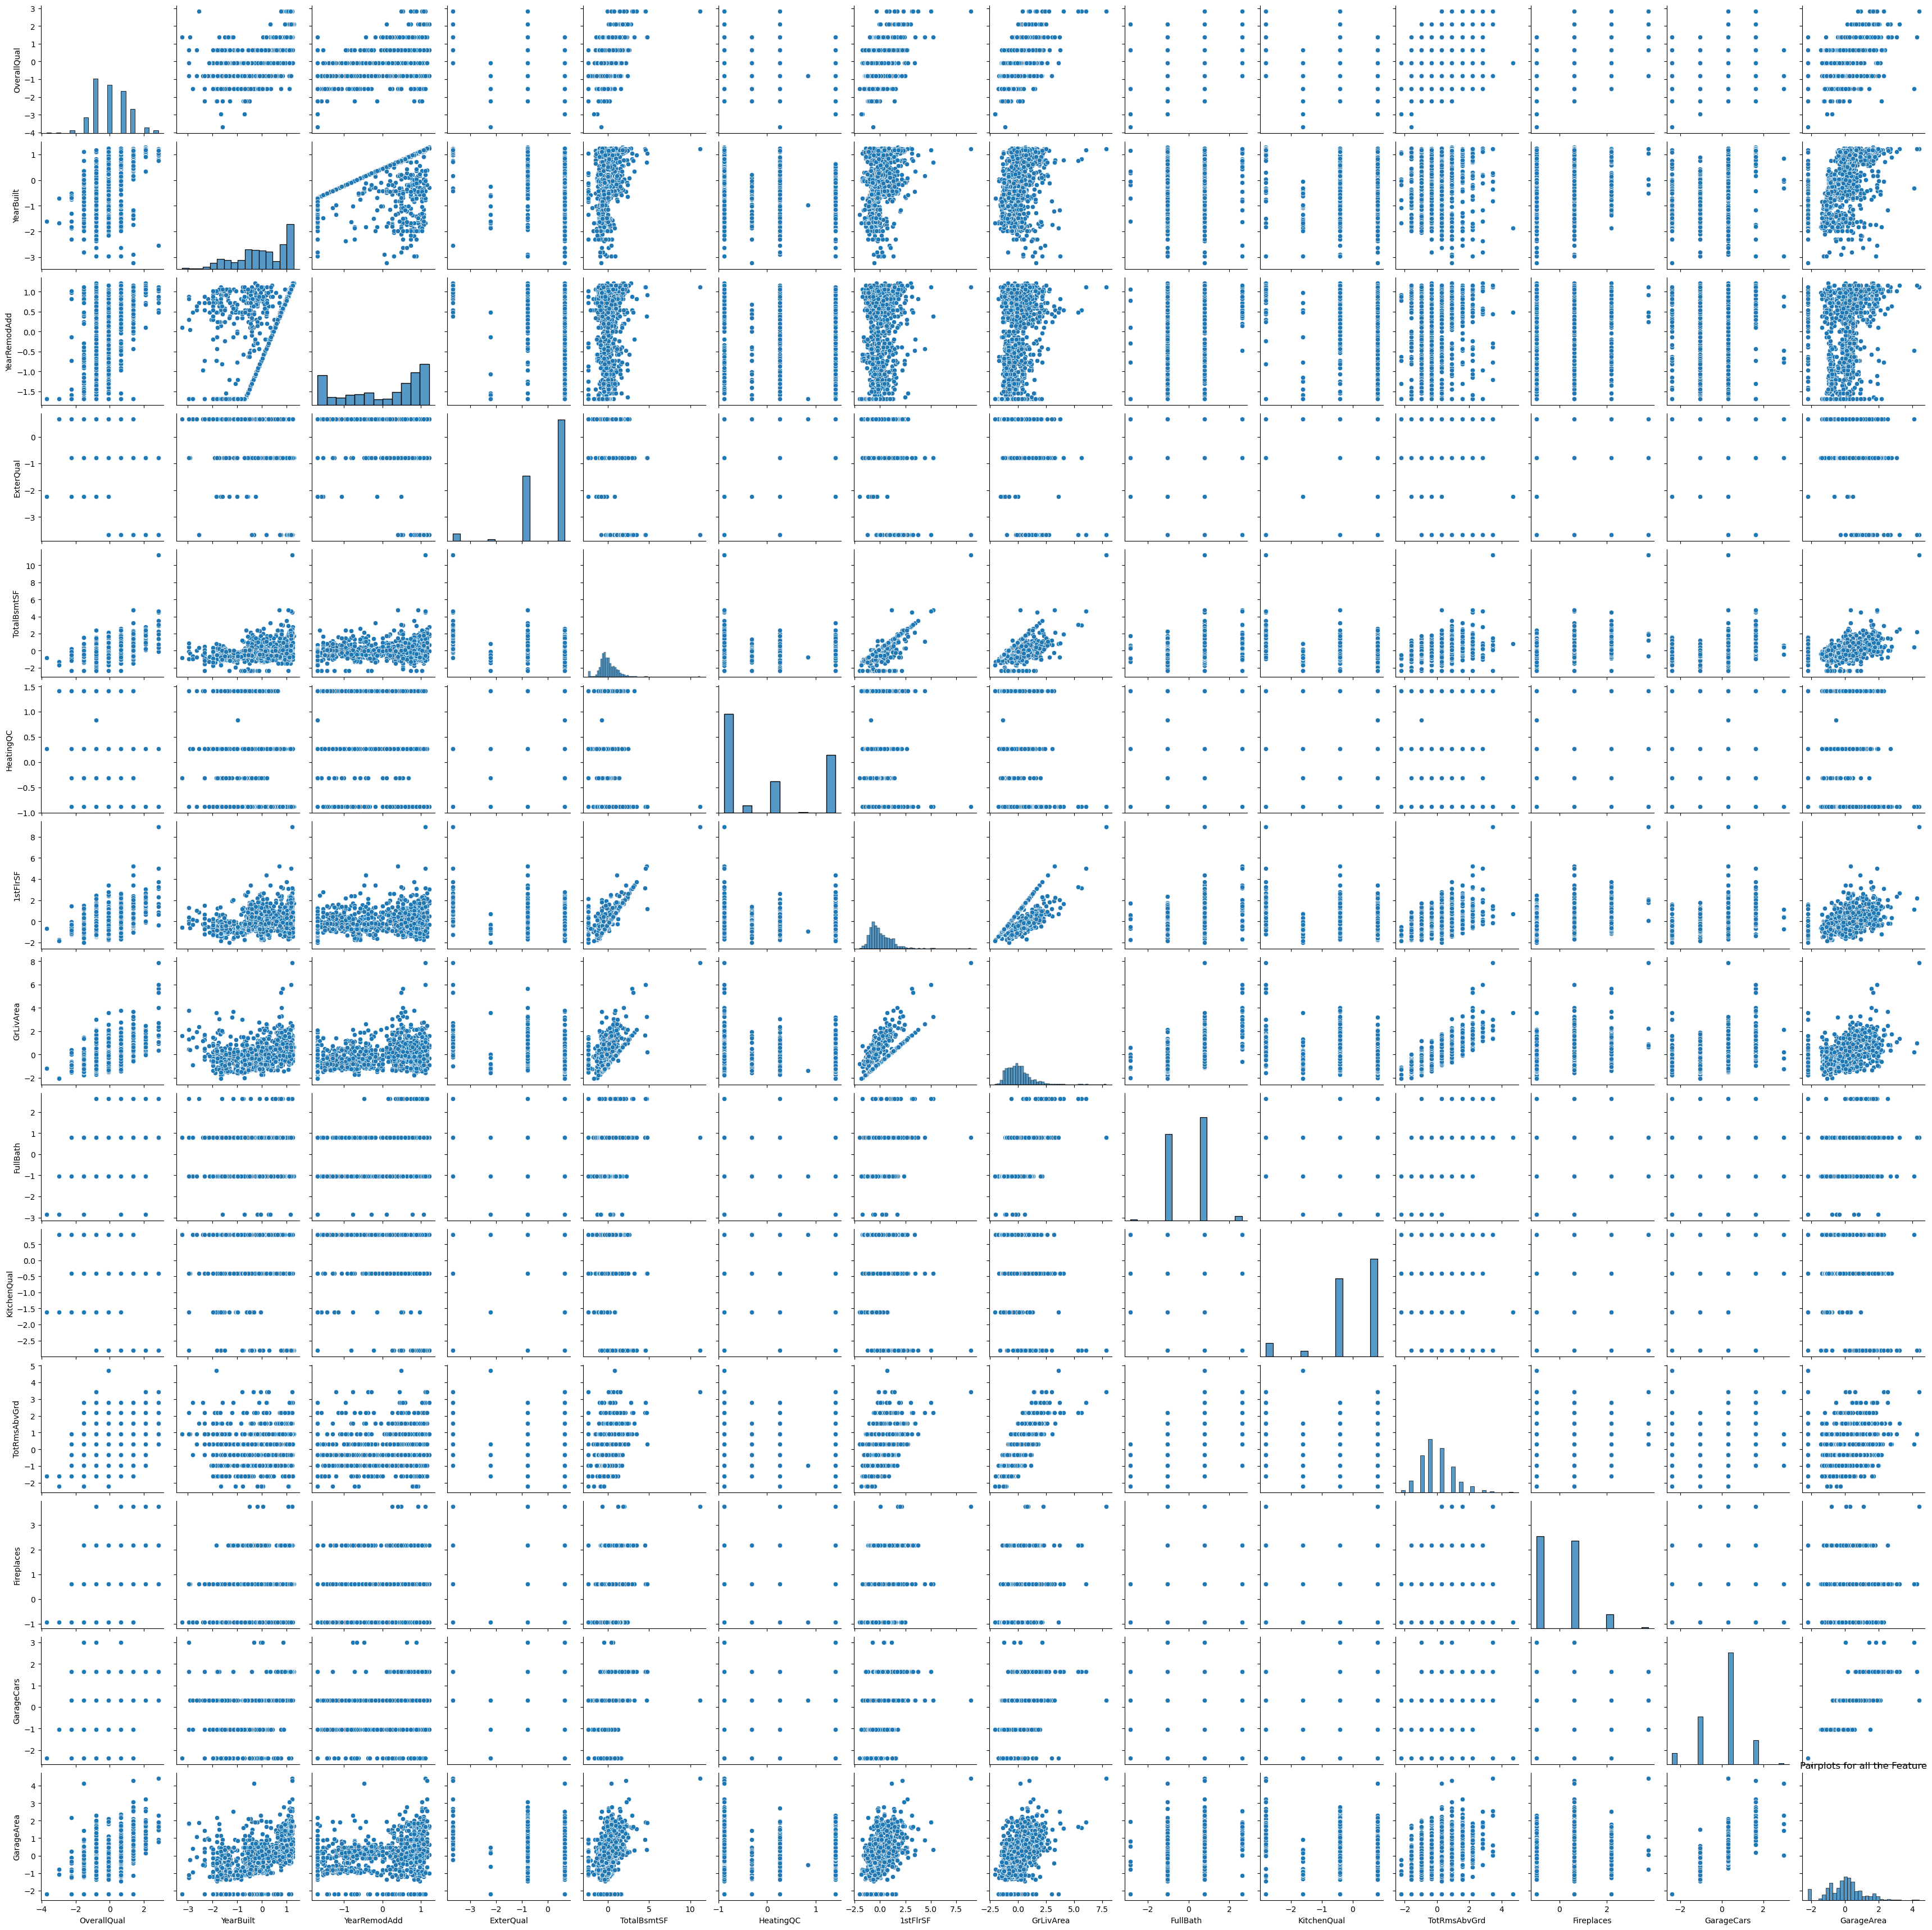

In [28]:
#Understanding the relationship between all the features
features = [i for i in key_features if i not in [target]]
sns.pairplot(Train_X_std[features])
plt.title('Pairplots for all the Feature')
plt.show()

## 5. Model Training

Let's first train basic linear regression model to predict house price.

In [29]:
lr = LinearRegression()
lr.fit(Train_X_std[features], Train_Y)
pred = lr.predict(Val_X_std[features])
print('RMSE Score for Linear regression: {}'.format(round(np.sqrt(mean_squared_error(pred, Val_Y)),20)))

RMSE Score for Linear regression: 32119.561229458996


Linear regression results in moderate prediction. Let's try advanced models and compare RMSE scores.

In [30]:
# Models for prediction
models = {
    'Multiple Linear Regression': LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Elastic-Net Regression': ElasticNet(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
}

In [31]:
Pred ={}

# Fitting Training and Validation data to different models
for name, mod in models.items():
    mod.fit(Train_X_std, Train_Y)
    Pred1 = mod.predict(Train_X_std)
    Pred2 = mod.predict(Val_X_std)
    Pred[name]=[Pred1,Pred2]

## 6. Model evaluation

In [36]:
# Function to evaluate our models

Eval_Matrix = pd.DataFrame(np.zeros([5,6]), columns=['Train-R2','Val-R2','Train-MSE','Val-MSE','Train-RMSE','Val-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
r2 = []
mse = []
rmse = []
r2_val = []
mse_val= []
rmse_val = []

def Evaluate(n,name, pred1,pred2):
    #Plotting predicted predictions alongside the actual datapoints 
    print('\033[1mEvaluation of',name)
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Model
    r2.append(round(r2_score(Train_Y, pred1),10))
    mse.append(round(mean_squared_error(Train_Y, pred1),20))
    rmse.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))
    r2_val.append(round(r2_score(Val_Y, pred2),10))
    mse_val.append(round(mean_squared_error(Val_Y, pred2),20))
    rmse_val.append(round(np.sqrt(mean_squared_error(Val_Y, pred2)),20))
    
    print('\n\nTraining Set Metrics:')
    print('\nR2-Score:',r2[n])
    print('Mean Squared Error (MSE):',mse[n])
    print('Root Mean Squared Error (RMSE):',rmse[n])

    print('\nValidation Set Metrics:')
    print('\nR2-Score:',r2_val[n])
    print('Mean Squared Error (MSE):',mse_val[n])
    print('Root Mean Squared Error (RMSE):',rmse_val[n])
    
    Eval_Matrix.loc[n,'Train-R2']  = r2[n]
    Eval_Matrix.loc[n,'Val-R2']   = mse[n]
    Eval_Matrix.loc[n,'Train-MSE'] = rmse[n]
    Eval_Matrix.loc[n,'Val-MSE']  = r2_val[n]
    Eval_Matrix.loc[n,'Train-RMSE']= mse_val[n]
    Eval_Matrix.loc[n,'Val-RMSE'] = rmse_val[n]
    
    # Plotting y_test and y_pred to understand the spread.
    print('\n\nResidual Plots:')
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

Evaluation of Multiple Linear Regression


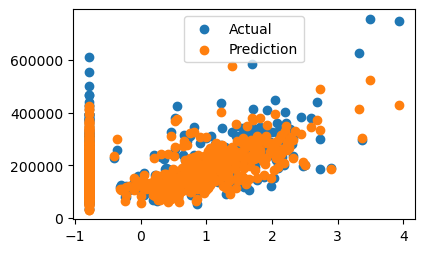



Training Set Metrics:

R2-Score: 0.8285153964
Mean Squared Error (MSE): 1076197287.9258294
Root Mean Squared Error (RMSE): 32805.44601016468

Validation Set Metrics:

R2-Score: -2.83133043013932e+20
Mean Squared Error (MSE): 1.820287864231545e+30
Root Mean Squared Error (RMSE): 1349180441687302.5


Residual Plots:


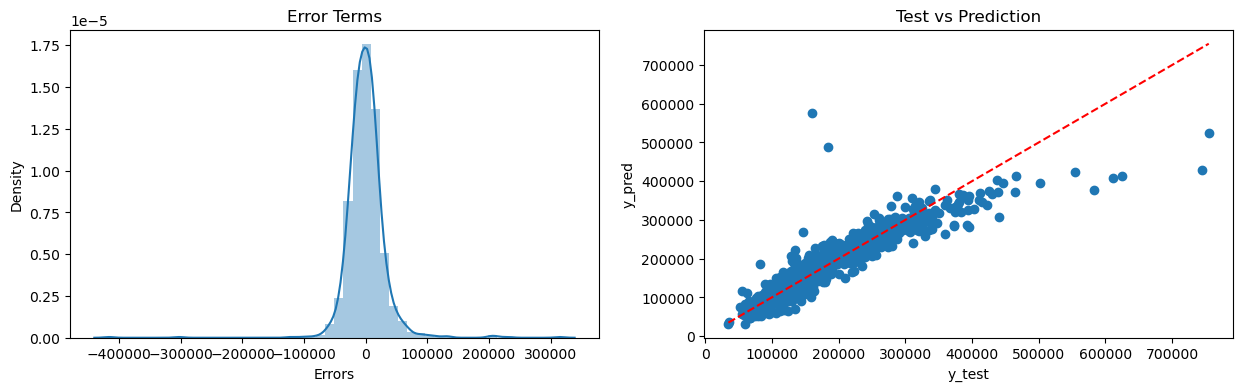

Evaluation of Ridge Regression


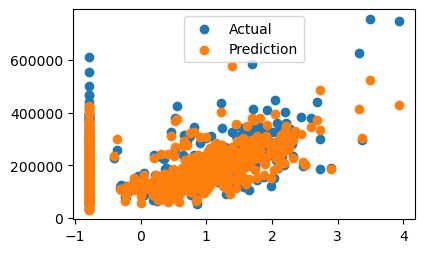



Training Set Metrics:

R2-Score: 0.8285133439
Mean Squared Error (MSE): 1076210169.1280034
Root Mean Squared Error (RMSE): 32805.64233676889

Validation Set Metrics:

R2-Score: 0.8604809667
Mean Squared Error (MSE): 896980445.9457985
Root Mean Squared Error (RMSE): 29949.63181653154


Residual Plots:


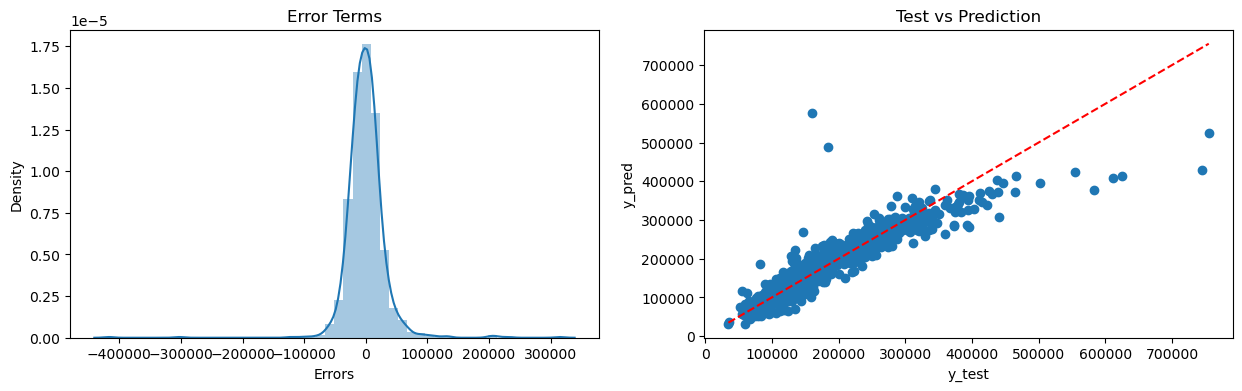

Evaluation of Lasso Regression


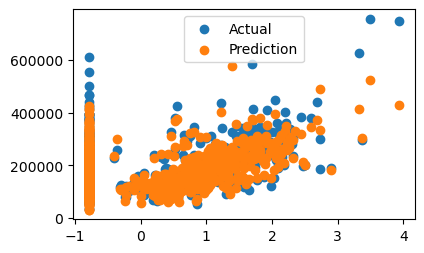



Training Set Metrics:

R2-Score: 0.8285136816
Mean Squared Error (MSE): 1076208050.0731184
Root Mean Squared Error (RMSE): 32805.61003964289

Validation Set Metrics:

R2-Score: 0.8610070698
Mean Squared Error (MSE): 893598081.4314715
Root Mean Squared Error (RMSE): 29893.110935991113


Residual Plots:


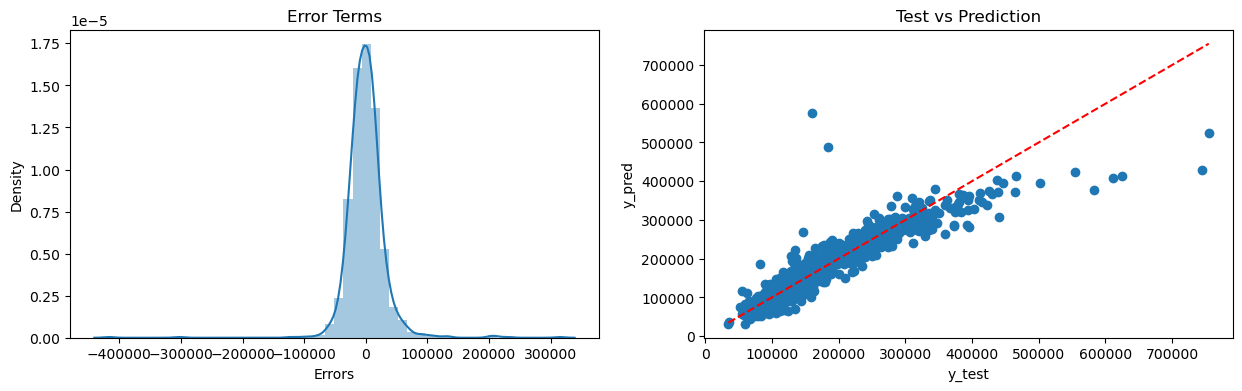

Evaluation of Elastic-Net Regression


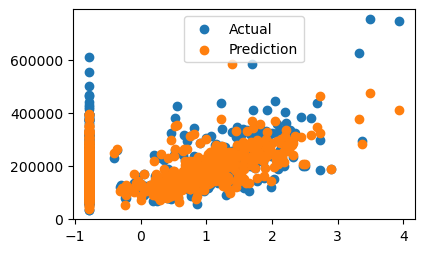



Training Set Metrics:

R2-Score: 0.8150771451
Mean Squared Error (MSE): 1160532611.9389014
Root Mean Squared Error (RMSE): 34066.590847029314

Validation Set Metrics:

R2-Score: 0.8552041247
Mean Squared Error (MSE): 930905739.0839404
Root Mean Squared Error (RMSE): 30510.747927311455


Residual Plots:


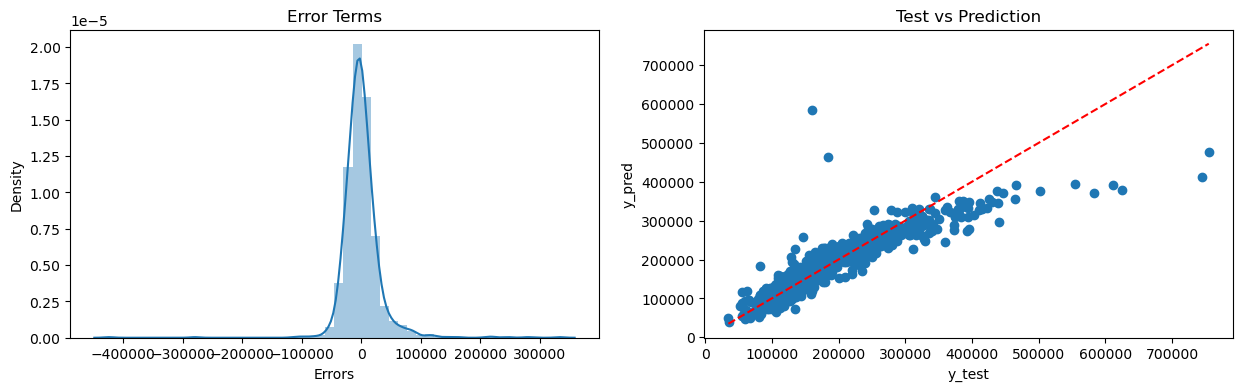

Evaluation of Random Forest Regressor


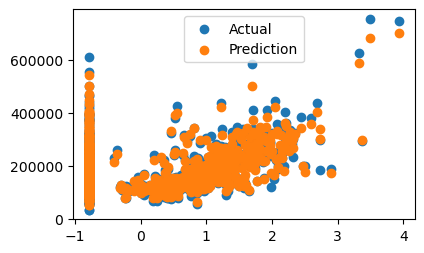



Training Set Metrics:

R2-Score: 0.9781003551
Mean Squared Error (MSE): 137437052.24850798
Root Mean Squared Error (RMSE): 11723.354991149417

Validation Set Metrics:

R2-Score: 0.8815149728
Mean Squared Error (MSE): 761750924.0901129
Root Mean Squared Error (RMSE): 27599.835580852887


Residual Plots:


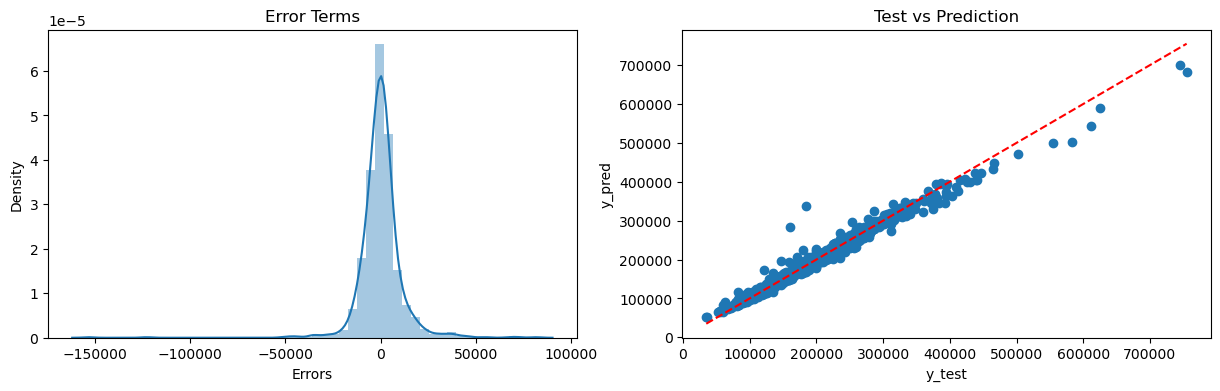

Evaluation of Gradient Boost Regressor


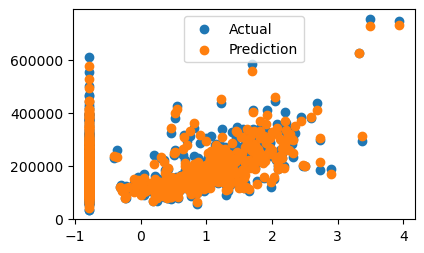



Training Set Metrics:

R2-Score: 0.9691692213
Mean Squared Error (MSE): 193486760.5912812
Root Mean Squared Error (RMSE): 13909.951854384011

Validation Set Metrics:

R2-Score: 0.8934322832
Mean Squared Error (MSE): 685133460.9057953
Root Mean Squared Error (RMSE): 26175.054171974414


Residual Plots:


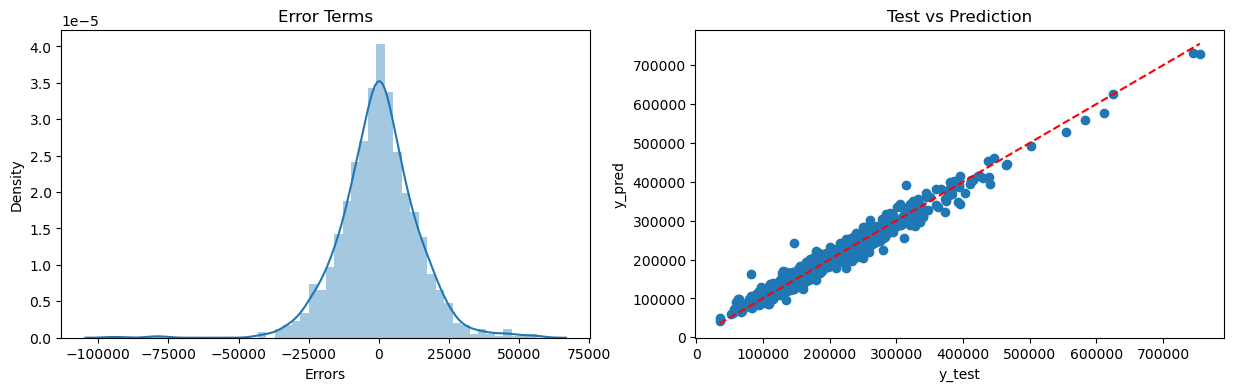

In [37]:
n = 0
# Evaluating the models
for name,pred in Pred.items():
    Evaluate(n,name,pred[0],pred[1])
    n += 1

Above plots indicate that all models have fitted well on the dataset. Let's plot RMSE score.

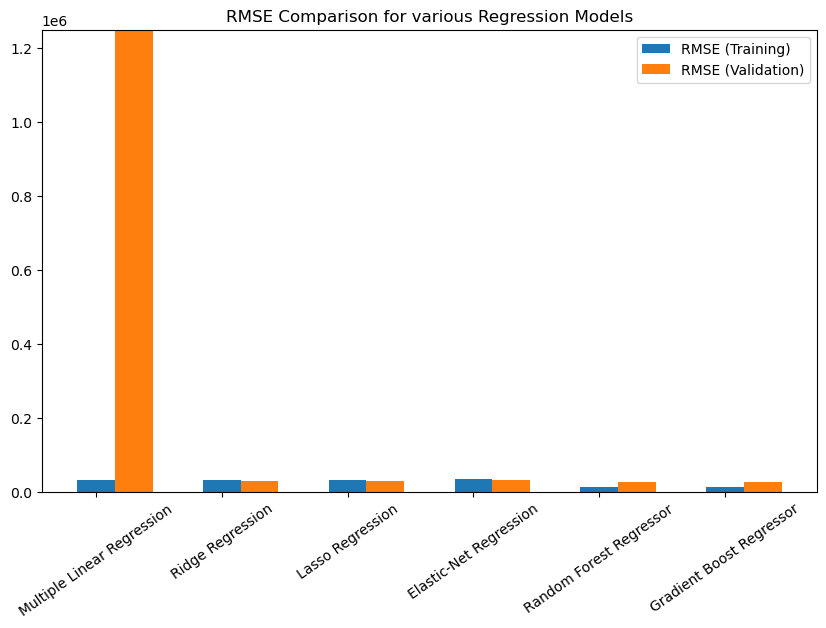

In [38]:
index = ['Multiple Linear Regression','Ridge Regression','Lasso Regression','Elastic-Net Regression','Random Forest Regressor','Gradient Boost Regressor']

def plot_rmse(train, test,label1, label2, title):
    plt.bar(np.arange(6), train, width=0.3, label=label1)
    plt.bar(np.arange(6)+0.3, test, width=0.3, label=label2)
    plt.xticks(np.arange(6), index, rotation =35)
    plt.title(title)
    plt.legend()
    plt.ylim([0,1.25e6])
    plt.show()

plot_rmse(rmse, rmse_val, 'RMSE (Training)', 'RMSE (Validation)', 'RMSE Comparison for various Regression Models')

Mupltiple Linear Regression is overfitting as the difference in RMSE score for Validation and training dataset is too high whereas other regularised regression models perform really well.

The best results can be seen in Random Forest Regressor and Gradient Boost Regressor.

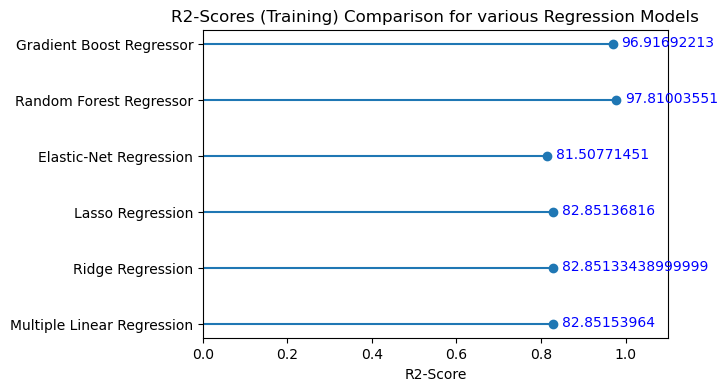

In [39]:
def plot_r2(r2,title):
    plt.figure(figsize=(6,4))
    plt.hlines(y=index, xmin=0, xmax=r2)
    plt.plot(r2, index,'o')
    plt.title(title)
    plt.xlabel('R2-Score')
    for i, v in enumerate(r2):
        plt.text(v+0.02, i-0.05, str(v*100), color='blue')
    plt.xlim([0,1.1])
    plt.show()
    
plot_r2(r2, 'R2-Scores (Training) Comparison for various Regression Models')

The Gradient Boost Regressor and Random Forest Regressor hold similar and consistent R2-Scores, which indicates better explainability power to understand the dataset.

## Submission

In [40]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = models['Random Forest Regressor'].predict(Test_X)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,429529.44
1,1462,407620.58
2,1463,635829.45
3,1464,635829.45
4,1465,417036.31
